## Observations and Insights 

In [34]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [10]:
# Study data files
# Read the mouse_data File
mouse_metadata_path = "Resources/Mouse_metadata.csv"
mouse_metadata_df = pd.read_csv(mouse_metadata_path)

mouse_metadata_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [11]:
# Study data files
# Read the study_results File

study_results_path = "Resources/Study_results.csv"
study_results_df = pd.read_csv(study_results_path)
study_results_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [13]:
# Combine the data into a single dataset


pymaceuticals_df = pd.merge(mouse_metadata_df, study_results_df,on="Mouse ID", how="outer" )

In [14]:
# Display the data table for preview
pymaceuticals_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [16]:
# Check the number of mice.

len(pymaceuticals_df["Mouse ID"])


1893

In [20]:
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mice = pymaceuticals_df.groupby(["Mouse ID","Timepoint"]).size().reset_index(name = "Match")
duplicate_mice = duplicate_mice.sort_values(["Match"],ascending=[False])
duplicate_mice.head(20)


,Mouse ID,Timepoint,Match
590,g989,20,2
589,g989,15,2
588,g989,10,2
587,g989,5,2
586,g989,0,2
0,a203,0,1
1264,q633,0,1
1260,q610,20,1
1261,q610,25,1
1262,q610,30,1


In [22]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_repeat = duplicate_mice.loc[duplicate_mice["Match"] != 1]
duplicate_mice_repeat.head()


,Mouse ID,Timepoint,Match
590,g989,20,2
589,g989,15,2
588,g989,10,2
587,g989,5,2
586,g989,0,2


In [23]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_pymaceuticals_df = pymaceuticals_df.drop_duplicates(["Mouse ID","Timepoint"],keep= 'last')

In [24]:
# Check the number of mice in the clean DataFrame.
len(clean_pymaceuticals_df["Mouse ID"])

1888

## Summary Statistics

In [ ]:
# Method 1:  Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.



In [38]:
# Method 2(optional): Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function. (https://pandas.pydata.org/pandas-docs/version/0.22.0/generated/pandas.core.groupby.DataFrameGroupBy.agg.html)

summary_table_stat_df = clean_pymaceuticals_df[["Drug Regimen","Tumor Volume (mm3)"]]

summary_table_stat_df.groupby(["Drug Regimen"]).agg(["mean","median","var","std","sem"])



Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.382993  50.783528  43.220205  6.574208  0.526358
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

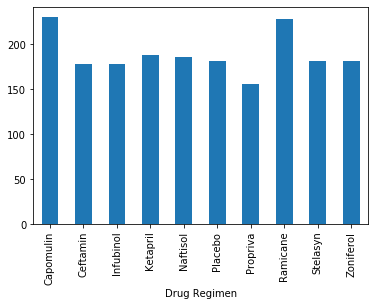

In [41]:
# Use Pandas to generate a bar plot showing the total number of mice in each treatment regimen throughout the course of the study. 

## Note: this plot will be identical to the one that uses Pyplot

clean_pymaceuticals_df.groupby(["Drug Regimen"]).size().plot(kind='bar')


Text(0.5, 0, 'Drug Regimen')

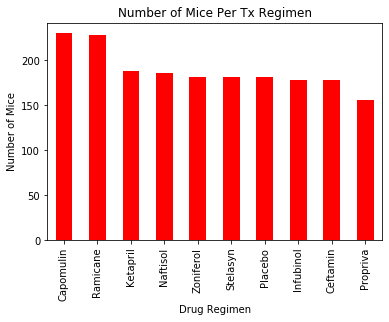

In [42]:
# Use Pyplot to generate a bar plot showing the total number of mice treatment in each treatment regimen throughout the course of the study.

##  Note: this plot will be identical to the one that uses Pandas

Drug_Regimen = clean_pymaceuticals_df["Drug Regimen"].value_counts()
Drug_Regimen.plot(kind="bar", facecolor="red")

# Put Labels 

plt.title("Number of Mice Per Tx Regimen")
plt.ylabel("Number of Mice")
plt.xlabel("Drug Regimen")




In [67]:
# Use Pandas to generate a pie plot showing the distribution of female versus male mice


mouse_metadata_Dstr=mouse_metadata_df.groupby("Sex")
male_female_counts=mouse_metadata_Dstr["Mouse ID"].count()
male_female_counts_df=pd.DataFrame(male_female_counts)
male_female_counts_df

,Mouse ID
Sex,
Female,124
Male,125


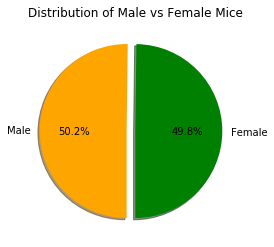

In [80]:
# Pie Chart Parameters
numbers=[125,124]
labels=["Male","Female"]
colors=["orange","green"]
explode=(0.1,0)

## Note: this plot will be identical to the one that uses Pyplot

male_female_pie=male_female_counts_df.plot.pie(y="Mouse ID",explode=(0,0.1),legend=False,autopct = "%.1f%%",
                                              startangle=270,colors=["green","orange"],shadow=True)

male_female_pie.axes.get_yaxis().set_visible(False)
male_female_pie.set_title("Distribution of Male vs Female Mice");


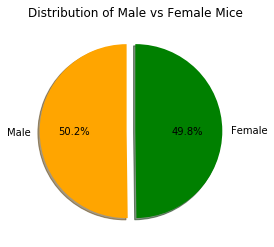

In [81]:
# Use Pyplot to generate a pie plot showing the distribution of female versus male mice

##  Note: this plot will be identical to the one that uses Pandas


plt.pie(numbers,explode,labels=labels,colors=colors,autopct="%1.1f%%",shadow=True,startangle=90);
plt.title("Distribution of Male vs Female Mice");


## Quartiles, Outliers and Boxplots

In [61]:
# Calculate the final tumor volume of each mouse across four of the drug regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

final_Tvol = clean_pymaceuticals_df.groupby(["Mouse ID","Drug Regimen"])["Timepoint"].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

final_Tvol = pd.merge(final_tv, clean_pymaceuticals_df, on=["Mouse ID", "Drug Regimen","Timepoint"])

final_Tvol = final_tv[["Mouse ID","Drug Regimen","Timepoint","Tumor Volume (mm3)"]]

final_Tvol.sort_values("Mouse ID")

final_Tvol.head()


,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
0,a203,Infubinol,45,67.973419
1,a251,Infubinol,45,65.525743
2,a262,Placebo,45,70.717621
3,a275,Ceftamin,45,62.999356
4,a366,Stelasyn,30,63.440686


In [ ]:
# Put the four drug regimens into a list that can be iterated over in a for-loop 
# (and later used for plot labels)



# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    # add subset 
    
    # Determine outliers using upper and lower bounds
    
    
    #If the data is in a dataframe, we use pandas to give quartile calculations


In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [52]:
# Generate a line plot of tumor volume vs. timepoint for a mouse treated with Capomulin
capomulin_mouse=clean_pymaceuticals_df.loc[(clean_pymaceuticals_df["Drug Regimen"]=="Capomulin")&(clean_pymaceuticals_df["Mouse ID"]=="x401")]
capomulin_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
20,x401,Capomulin,Female,16,15,0,45.000000,0
21,x401,Capomulin,Female,16,15,5,45.473753,0
22,x401,Capomulin,Female,16,15,10,39.113891,0
23,x401,Capomulin,Female,16,15,15,39.776250,0
24,x401,Capomulin,Female,16,15,20,36.065835,0
25,x401,Capomulin,Female,16,15,25,36.617120,0
26,x401,Capomulin,Female,16,15,30,32.915292,0
27,x401,Capomulin,Female,16,15,35,30.206825,0
28,x401,Capomulin,Female,16,15,40,28.167397,0
29,x401,Capomulin,Female,16,15,45,28.484033,0


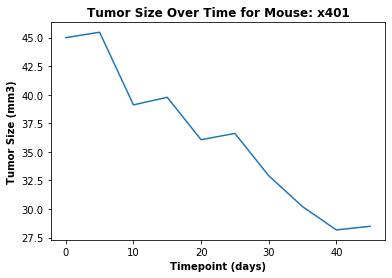

In [53]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen. 
# Note: this means mouse weight goes on the x-axis, with average tumor volume on the y-axis. 

timepoint_x=capomulin_mouse["Timepoint"]
tumorsize_y=capomulin_mouse["Tumor Volume (mm3)"]
plt.plot(timepoint_x,tumorsize_y);
plt.xlabel("Timepoint (days)",weight="bold");
plt.ylabel("Tumor Size (mm3)",weight="bold");
plt.title("Tumor Size Over Time for Mouse: x401",weight="bold");

## Correlation and Regression

In [54]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen.
%matplotlib inline
from scipy.stats import linregress

The r-squared is: 0.8419363424694718
y = 0.95x + 21.55


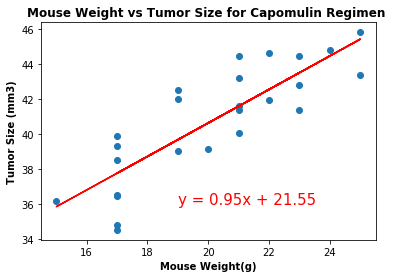

In [85]:
#Create a scatter plot For Calculations 

#defining variables

capomulin_df=clean_pymaceuticals_df.loc[(clean_pymaceuticals_df["Drug Regimen"]=="Capomulin")]
mouse_cal=capomulin_df.groupby("Mouse ID")

mouse_weight=mouse_cal["Weight (g)"].mean()

ave_tumor=mouse_cal["Tumor Volume (mm3)"].mean()

plt.scatter(mouse_weight,ave_tumor,marker="o");
plt.xlabel("Mouse Weight(g)",weight="bold");
plt.ylabel("Tumor Size (mm3)",weight="bold");
plt.title("Mouse Weight vs Tumor Size for Capomulin Regimen ",weight="bold");

# Calculate the correlation coefficient and linear regression for mouse weight and average tumor volume for Capomulin regimen 
#linear regression values to be plotted against weight

(slope, intercept, rvalue, pvalue, stderr) = linregress(mouse_weight, ave_tumor)
regress_values = mouse_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot the regression values to form the regression line
plt.plot(mouse_weight,regress_values,"r-")
plt.annotate(line_eq,(19,36),fontsize=15,color="red");

print(f"The r-squared is: {rvalue}")
print(line_eq)

